ARIMA Modeling for Log DPI Data in Google Colab
Follow these steps to fit an ARIMA model:
1. Upload your Excel file with log DPI data (PDI column)
2. Analyze stationarity
3. Transform data if needed
4. Identify parameters
5. Fit model
6. Check diagnostics
7. Generate forecasts

Please upload your Excel file containing the log DPI data.
The file should have a column named 'PDI' with log-transformed DPI data.


Saving Table 21.xlsx to Table 21 (2).xlsx

Step 2: Initial Data Analysis


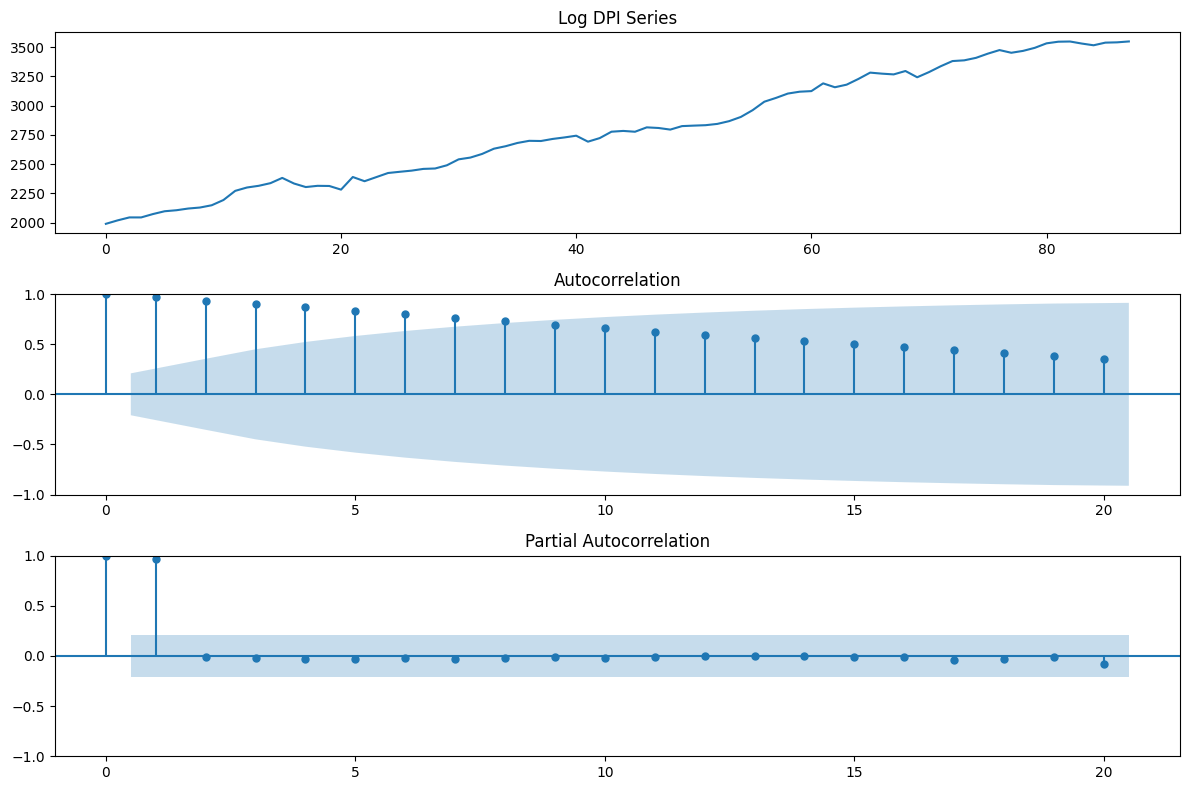

Results of Dickey-Fuller Test:
Test Statistic                 -0.671576
p-value                         0.853975
#Lags Used                      0.000000
Number of Observations Used    87.000000
Critical Value (1%)            -3.507853
Critical Value (5%)            -2.895382
Critical Value (10%)           -2.584824
dtype: float64

Series is not stationary. Applying differencing...
Results of Dickey-Fuller Test:
Test Statistic                -9.636167e+00
p-value                        1.564492e-16
#Lags Used                     0.000000e+00
Number of Observations Used    8.600000e+01
Critical Value (1%)           -3.508783e+00
Critical Value (5%)           -2.895784e+00
Critical Value (10%)          -2.585038e+00
dtype: float64


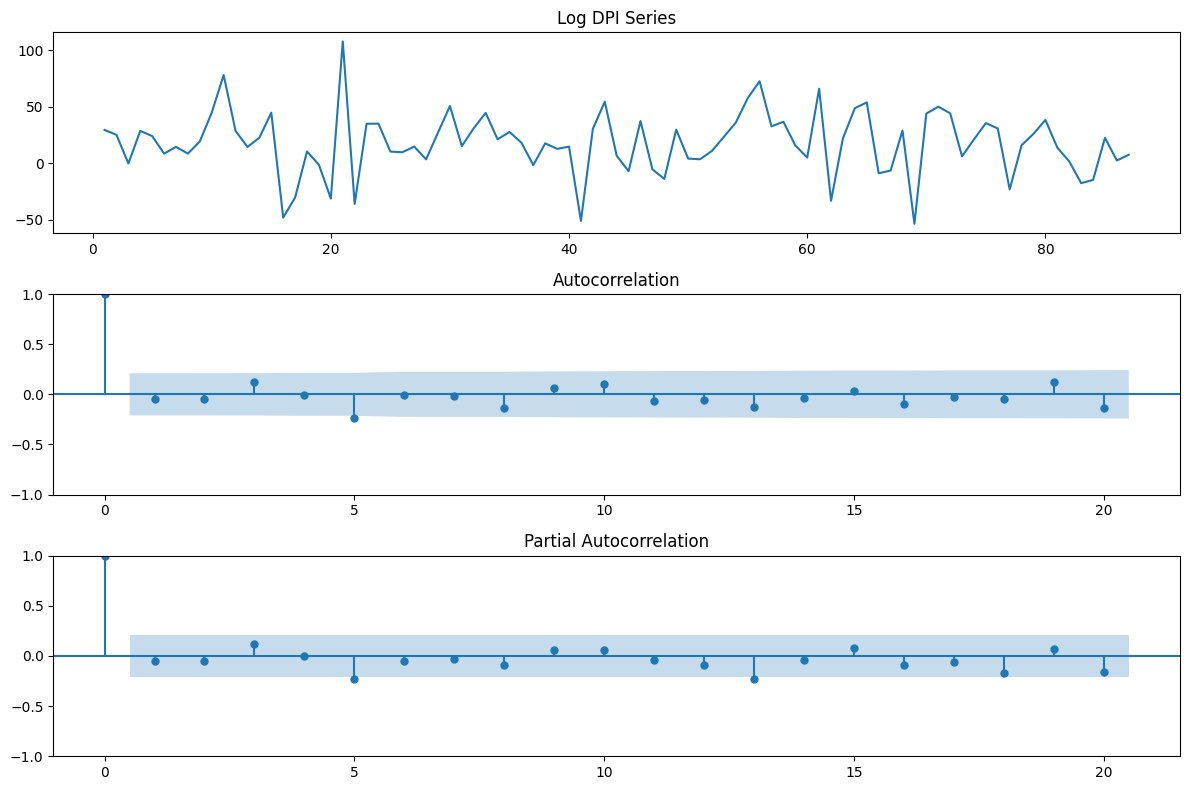

Series became stationary after 1 differences

Step 4: Based on ACF/PACF plots:
- p (AR order): Look for significant lags in PACF
- d (differencing):  1
- q (MA order): Look for significant lags in ACF

Step 6: Model Summary
                               SARIMAX Results                                
Dep. Variable:                    PDI   No. Observations:                   88
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -414.881
Date:                Fri, 14 Mar 2025   AIC                            835.762
Time:                        17:58:49   BIC                            843.160
Sample:                             0   HQIC                           838.741
                                 - 88                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------

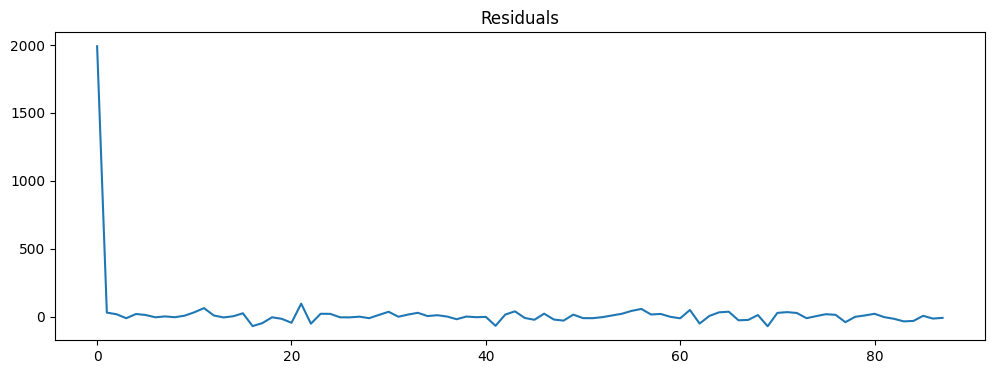


Step 7: 5-period Forecast
88    3564.906989
89    3582.313951
90    3599.720887
91    3617.127798
92    3634.534682
Name: predicted_mean, dtype: float64


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")
from google.colab import files

def load_dpi_data():
    print("Please upload your Excel file containing the log DPI data.")
    print("The file should have a column named 'PDI' with log-transformed DPI data.")

    uploaded = files.upload()

    if len(uploaded) == 0:
        print("No file uploaded. Please try again.")
        return None

    file_name = list(uploaded.keys())[0]
    try:
        data = pd.read_excel(file_name)
        # Use PDI directly since it's already log-transformed
        log_dpi = data['PDI']
        return pd.Series(log_dpi)
    except Exception as e:
        print(f"Error loading file: {str(e)}")
        print("Please ensure it's a valid Excel file with a 'PDI' column.")
        return None

def check_stationarity(timeseries):
    print("Results of Dickey-Fuller Test:")
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                            '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    return dfoutput['p-value'] < 0.05

def plot_diagnostics(timeseries):
    plt.figure(figsize=(12,8))
    plt.subplot(311)
    plt.plot(timeseries)
    plt.title('Log DPI Series')
    plt.subplot(312)
    plot_acf(timeseries, ax=plt.gca())
    plt.subplot(313)
    plot_pacf(timeseries, ax=plt.gca())
    plt.tight_layout()
    plt.show()

def fit_arima_model():
    # Step 1: Load the data
    dpi_series = load_dpi_data()
    if dpi_series is None:
        return

    # Step 2: Visualize and check stationarity
    print("\nStep 2: Initial Data Analysis")
    plot_diagnostics(dpi_series)
    is_stationary = check_stationarity(dpi_series)

    # Step 3: Make series stationary if needed
    diff_order = 0
    temp_series = dpi_series.copy()

    if not is_stationary:
        print("\nSeries is not stationary. Applying differencing...")
        while not is_stationary and diff_order < 2:
            diff_order += 1
            temp_series = temp_series.diff().dropna()
            is_stationary = check_stationarity(temp_series)
            plot_diagnostics(temp_series)
        print(f"Series became stationary after {diff_order} differences")

    # Step 4: Identify ARIMA parameters
    print("\nStep 4: Based on ACF/PACF plots:")
    print("- p (AR order): Look for significant lags in PACF")
    print("- d (differencing): ", diff_order)
    print("- q (MA order): Look for significant lags in ACF")

    # Step 5: Fit ARIMA model
    try:
        model = ARIMA(dpi_series, order=(1, diff_order, 1))
        results = model.fit()

        # Step 6: Model diagnostics
        print("\nStep 6: Model Summary")
        print(results.summary())

        # Plot residuals
        residuals = pd.DataFrame(results.resid)
        plt.figure(figsize=(12,4))
        plt.plot(residuals)
        plt.title('Residuals')
        plt.show()

        # Step 7: Forecasting
        forecast = results.forecast(steps=5)
        print("\nStep 7: 5-period Forecast")
        print(forecast)

    except Exception as e:
        print(f"Error fitting ARIMA model: {str(e)}")
        print("Please check the data and parameters.")

# Run the analysis
print("ARIMA Modeling for Log DPI Data in Google Colab")
print("Follow these steps to fit an ARIMA model:")
print("1. Upload your Excel file with log DPI data (PDI column)")
print("2. Analyze stationarity")
print("3. Transform data if needed")
print("4. Identify parameters")
print("5. Fit model")
print("6. Check diagnostics")
print("7. Generate forecasts\n")
fit_arima_model()